# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

import sys
sys.path.insert(0, '../../')

In [2]:
from pdpbox import pdp, get_dataset

## get dataset

In [3]:
test_titanic = get_dataset.titanic()

In [4]:
test_titanic.keys()

['xgb_model', 'data', 'features', 'target']

In [5]:
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

## Binary feature: Sex

In [6]:
pdp_sex = pdp.pdp_isolate(model=titanic_model, 
                          train_X=titanic_data[titanic_features], 
                          feature='Sex')

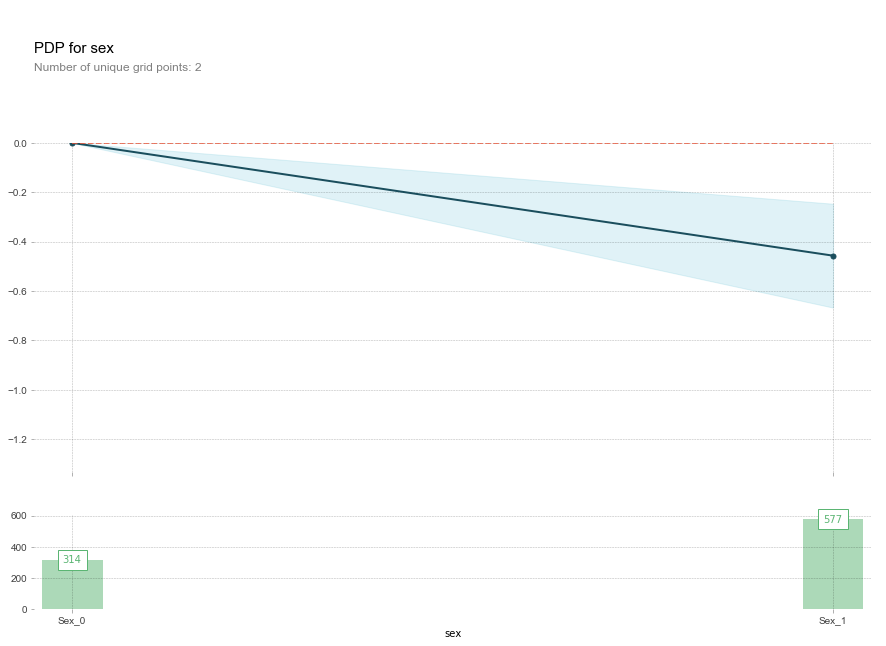

In [7]:
# default
fig, axes = pdp.pdp_plot(pdp_sex, 'sex')

In [10]:
pdp_sex = pdp.pdp_isolate(model=titanic_model, 
                          train_X=titanic_data[titanic_features], 
                          feature='Sex')

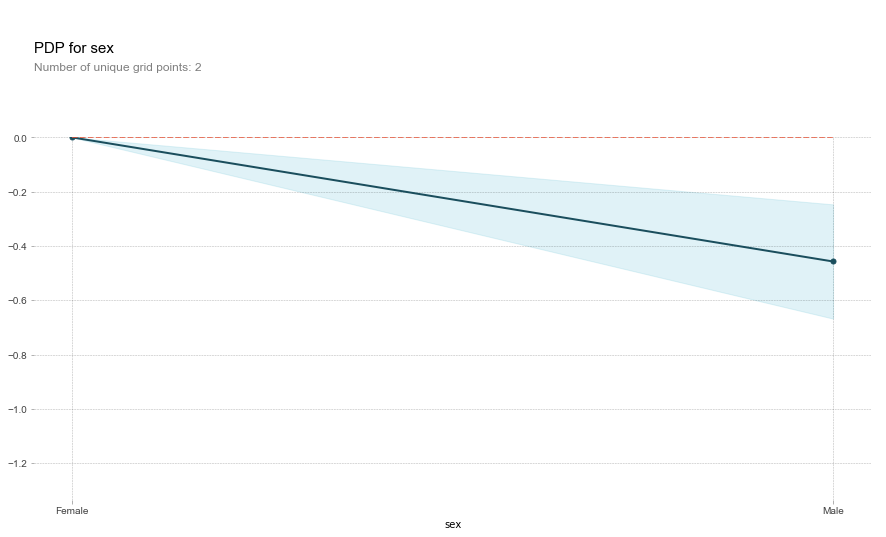

In [11]:
# default
fig, axes = pdp.pdp_plot(pdp_sex, 'sex')
_ = axes['pdp_ax'].set_xticklabels(['Female', 'Male'])

In [9]:
axes

{'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0xd78be48>,
 'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0xd6e77b8>}

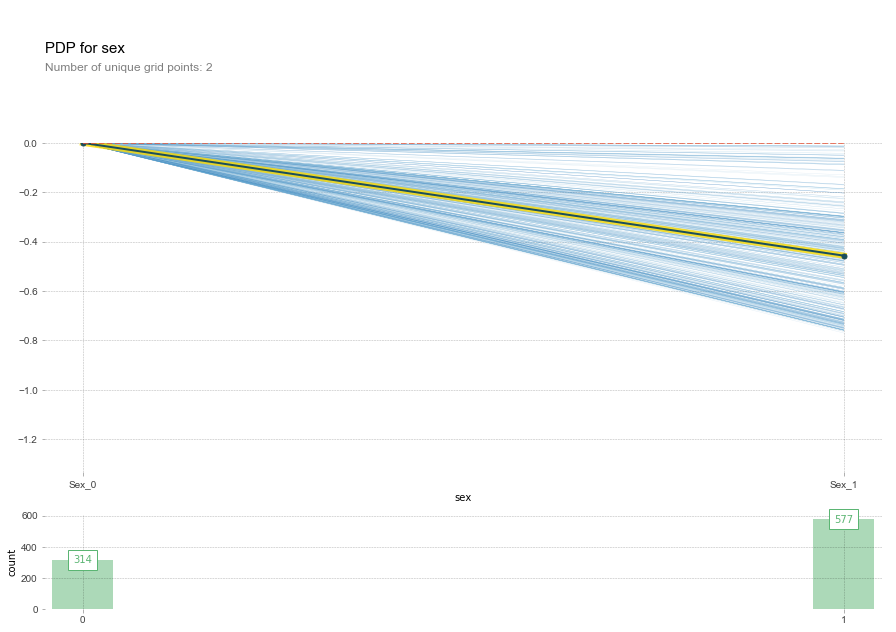

In [8]:
# also plot out the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_lines=True, frac_to_plot=0.5)

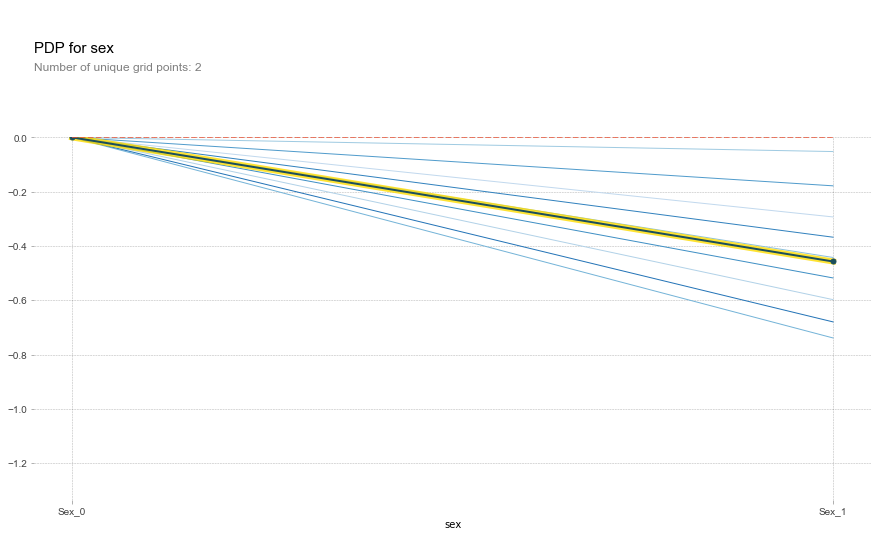

In [19]:
# try to do clustering on all the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', center=True, frac_to_plot=0.5, cluster=True, 
                         n_cluster_centers=10, cluster_method='accurate')

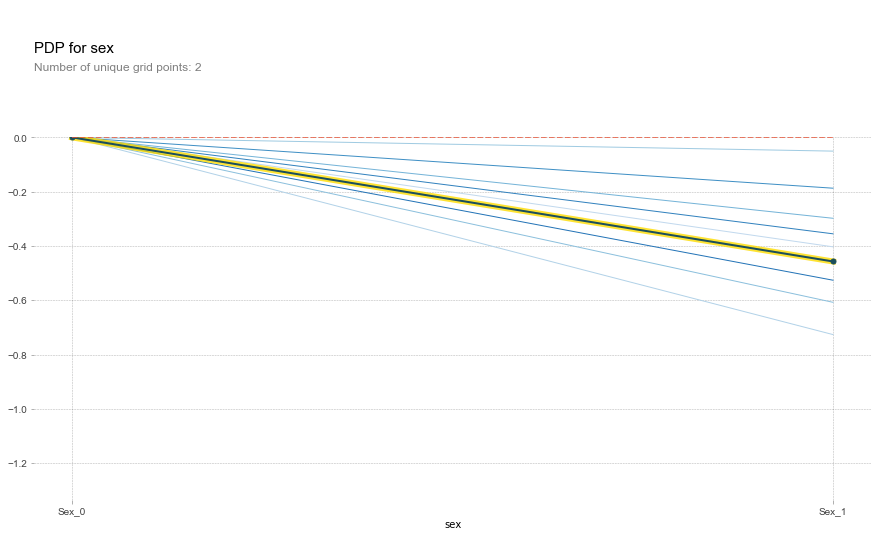

In [22]:
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', center=True, frac_to_plot=0.5, cluster=True, 
                         n_cluster_centers=10, cluster_method='approx')

## one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

In [10]:
df = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

In [11]:
df

,x,index,0,display_column
0,0,Embarked_C,168,Embarked_C
1,1,Embarked_S,646,Embarked_S
2,2,Embarked_Q,77,Embarked_Q


In [13]:
titanic_data[['Embarked_C', 'Embarked_S', 'Embarked_Q']].sum(axis=0)

Embarked_C    168
Embarked_S    646
Embarked_Q     77
dtype: int64

In [8]:
pdp_embark = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

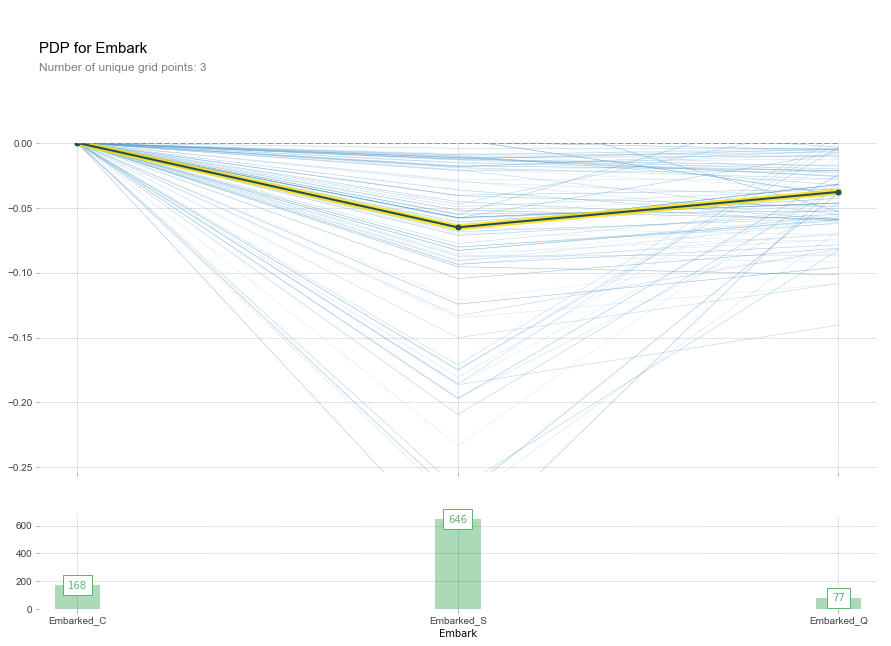

In [9]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_lines=True, frac_to_plot=100)

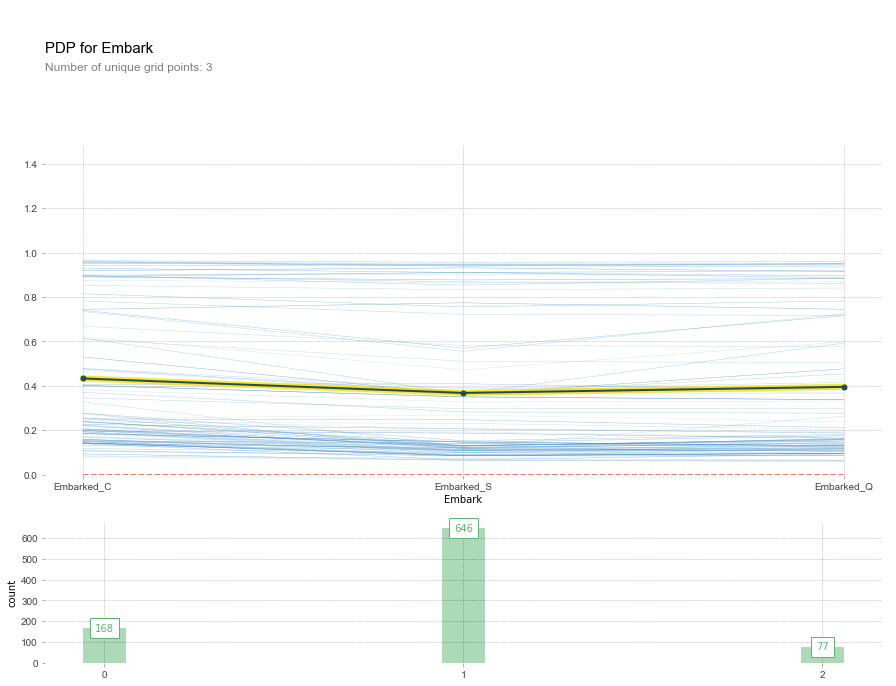

In [12]:
# try to set center=False, it's harder to tell the difference when the lines are not centered
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_lines=True, frac_to_plot=100)

## numeric feature: fare

In [14]:
df= pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare')

In [15]:
df

,x,count,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper
0,0,0.0,< 0.00,NaN,0.000000,< 0.00,0.00,0.00
1,1,99.0,"[0.00, 7.73)",0.000000,7.732844,"[0.00, 11.11)",0.00,11.11
2,2,86.0,"[7.73, 7.90)",7.732844,7.895800,"[11.11, 22.22)",11.11,22.22
3,3,110.0,"[7.90, 8.66)",7.895800,8.662500,"[22.22, 33.33)",22.22,33.33
4,4,91.0,"[8.66, 13.00)",8.662500,13.000000,"[33.33, 44.44)",33.33,44.44
5,5,108.0,"[13.00, 16.70)",13.000000,16.700000,"[44.44, 55.56)",44.44,55.56
6,6,71.0,"[16.70, 26.00)",16.700000,26.000000,"[55.56, 66.67)",55.56,66.67
7,7,128.0,"[26.00, 35.11)",26.000000,35.111111,"[66.67, 77.78)",66.67,77.78
8,8,96.0,"[35.11, 73.50)",35.111111,73.500000,"[77.78, 88.89)",77.78,88.89
9,9,99.0,"[73.50, 512.33)",73.500000,512.329200,"[88.89, 100.00)",88.89,100.00


In [10]:
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare')

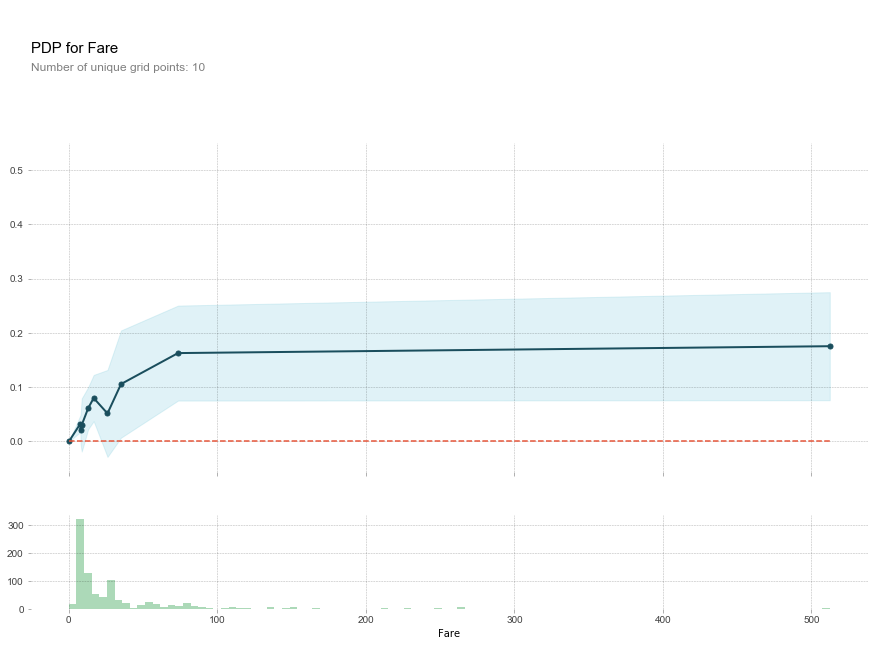

In [11]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare')

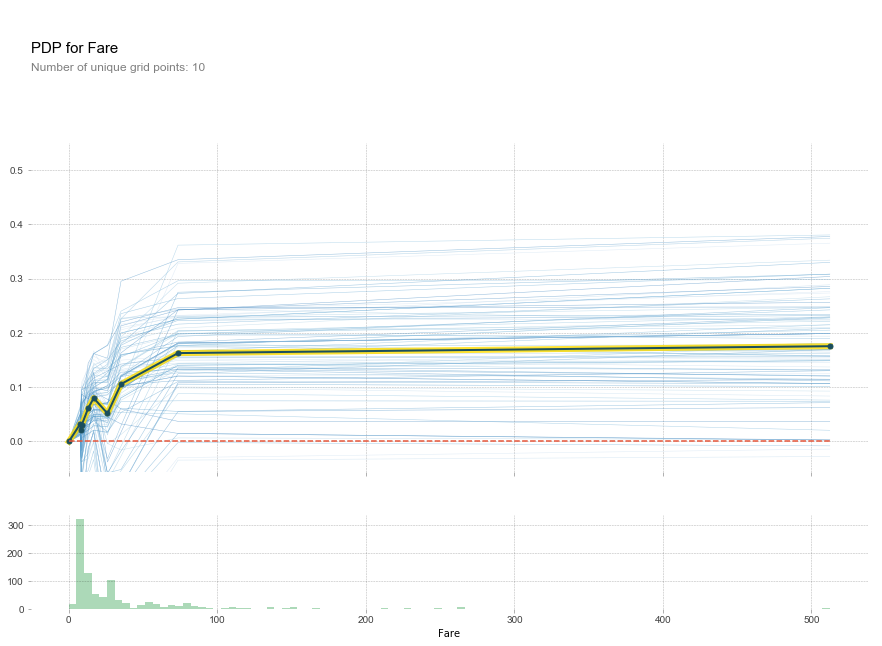

In [12]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=100)

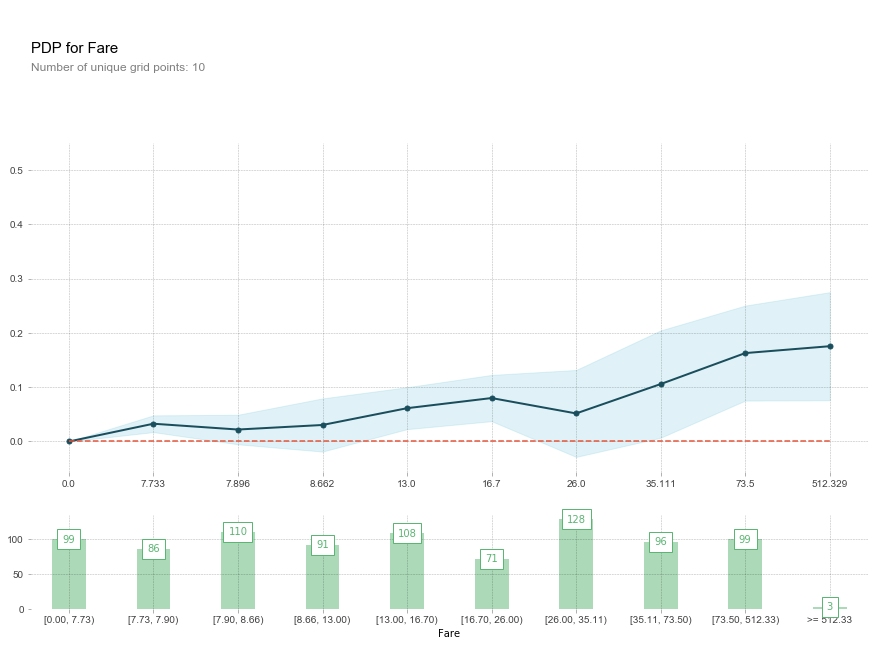

In [13]:
# for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True)

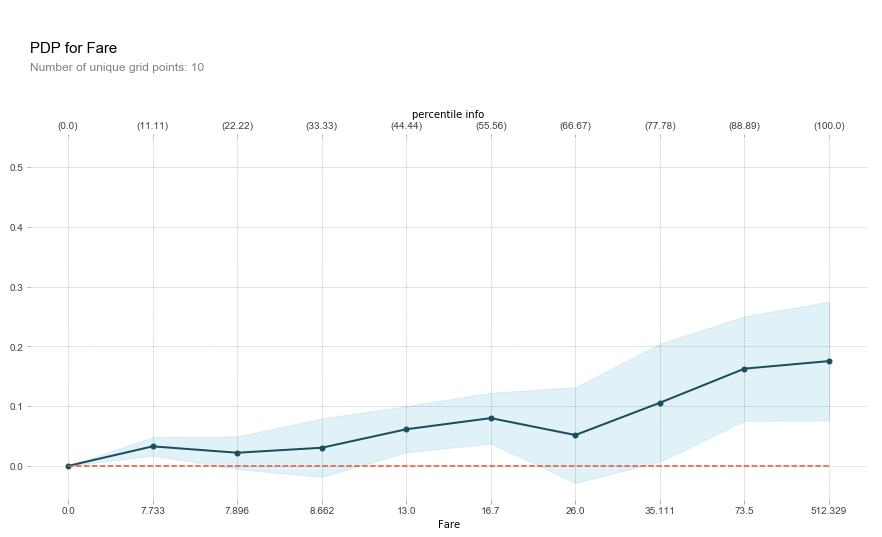

In [8]:
# for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True, show_percentile=True)

In [16]:
df = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=20)

In [17]:
df

,x,count,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper
0,0,0.0,< 0.00,NaN,0.000000,< 0.00,0.00,0.00
1,1,43.0,"[0.00, 7.22)",0.000000,7.225000,"[0.00, 5.26)",0.00,5.26
2,2,50.0,"[7.22, 7.65)",7.225000,7.650000,"[5.26, 10.53)",5.26,10.53
3,3,47.0,"[7.65, 7.78)",7.650000,7.775000,"[10.53, 15.79)",10.53,15.79
4,4,45.0,"[7.78, 7.90)",7.775000,7.895800,"[15.79, 21.05)",15.79,21.05
5,5,38.0,"[7.90, 7.92)",7.895800,7.925000,"[21.05, 26.32)",21.05,26.32
6,6,19.0,"[7.92, 8.05)",7.925000,8.050000,"[26.32, 31.58)",26.32,31.58
7,7,78.0,"[8.05, 9.50)",8.050000,9.500000,"[31.58, 36.84)",31.58,36.84
8,8,55.0,"[9.50, 12.28)",9.500000,12.284211,"[36.84, 42.11)",36.84,42.11
9,9,11.0,"[12.28, 13.00)",12.284211,13.000000,"[42.11, 47.37)",42.11,47.37


In [9]:
# you can also add more number of grid points for the numeric feature
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=20)

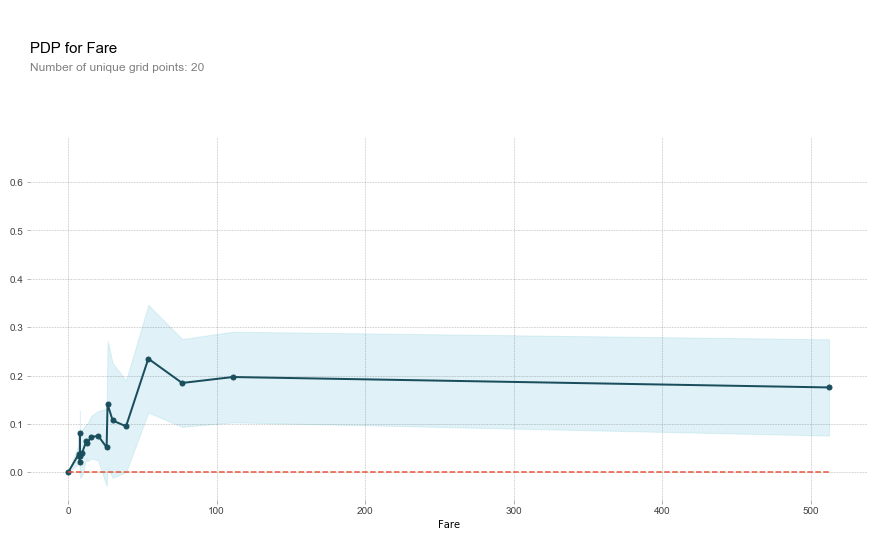

In [39]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5)

In [18]:
df = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=10, percentile_range=(5, 95))

In [19]:
df

,x,count,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper
0,0,43,< 7.22,NaN,7.22500,< 5.00,0.0,5.0
1,1,63,"[7.22, 7.75)",7.22500,7.75000,"[5.00, 15.00)",5.0,15.0
2,2,117,"[7.75, 7.91)",7.75000,7.91040,"[15.00, 25.00)",15.0,25.0
3,3,88,"[7.91, 9.00)",7.91040,9.00000,"[25.00, 35.00)",25.0,35.0
4,4,75,"[9.00, 13.00)",9.00000,13.00000,"[35.00, 45.00)",35.0,45.0
5,5,99,"[13.00, 16.10)",13.00000,16.10000,"[45.00, 55.00)",45.0,55.0
6,6,80,"[16.10, 26.00)",16.10000,26.00000,"[55.00, 65.00)",55.0,65.0
7,7,101,"[26.00, 31.00)",26.00000,31.00000,"[65.00, 75.00)",65.0,75.0
8,8,89,"[31.00, 56.50)",31.00000,56.49580,"[75.00, 85.00)",75.0,85.0
9,9,91,"[56.50, 112.08)",56.49580,112.07915,"[85.00, 95.00)",85.0,95.0


In [20]:
df.iloc[0]['count']

43

In [21]:
df = df.iloc[1:]

In [22]:
df

,x,count,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper
1,1,63,"[7.22, 7.75)",7.22500,7.75000,"[5.00, 15.00)",5.0,15.0
2,2,117,"[7.75, 7.91)",7.75000,7.91040,"[15.00, 25.00)",15.0,25.0
3,3,88,"[7.91, 9.00)",7.91040,9.00000,"[25.00, 35.00)",25.0,35.0
4,4,75,"[9.00, 13.00)",9.00000,13.00000,"[35.00, 45.00)",35.0,45.0
5,5,99,"[13.00, 16.10)",13.00000,16.10000,"[45.00, 55.00)",45.0,55.0
6,6,80,"[16.10, 26.00)",16.10000,26.00000,"[55.00, 65.00)",55.0,65.0
7,7,101,"[26.00, 31.00)",26.00000,31.00000,"[65.00, 75.00)",65.0,75.0
8,8,89,"[31.00, 56.50)",31.00000,56.49580,"[75.00, 85.00)",75.0,85.0
9,9,91,"[56.50, 112.08)",56.49580,112.07915,"[85.00, 95.00)",85.0,95.0
10,10,45,>= 112.08,112.07915,NaN,>= 95.00,95.0,100.0


In [23]:
df.iloc[-1]['count']

45

In [14]:
# try to choose a reasonable percentile range
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=10, percentile_range=(5, 95))

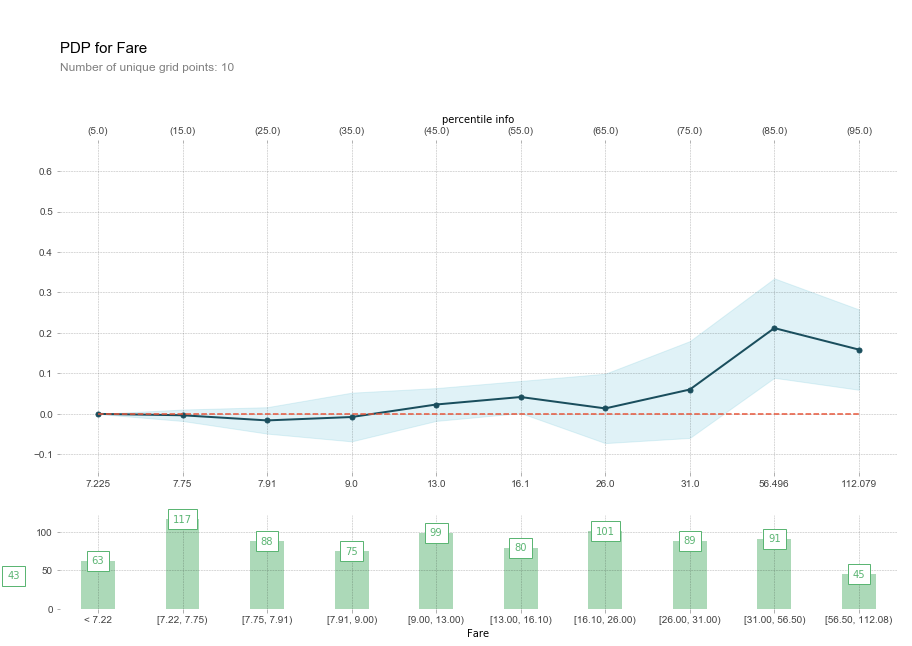

In [15]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5, x_quantile=True, show_percentile=True)

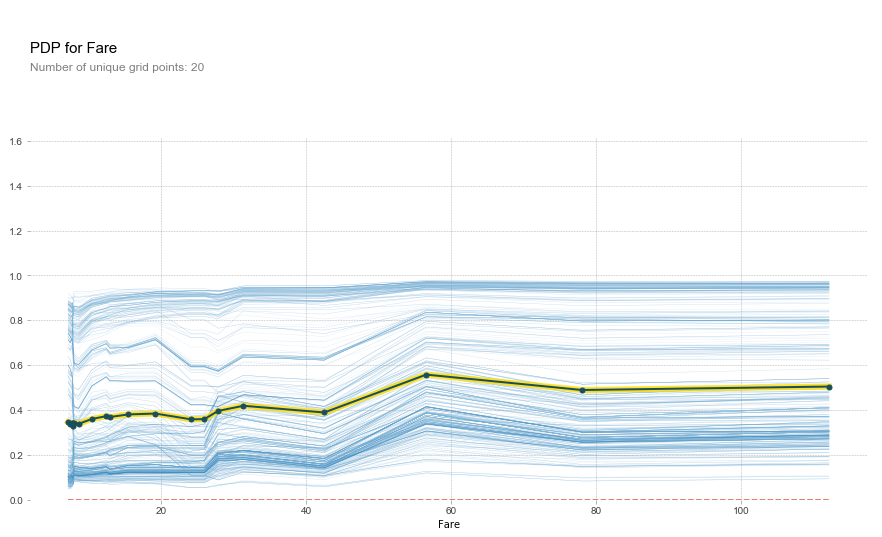

In [43]:
# try to set center=False
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

In [45]:
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', grid_type='equal', grid_range=(0, 50))

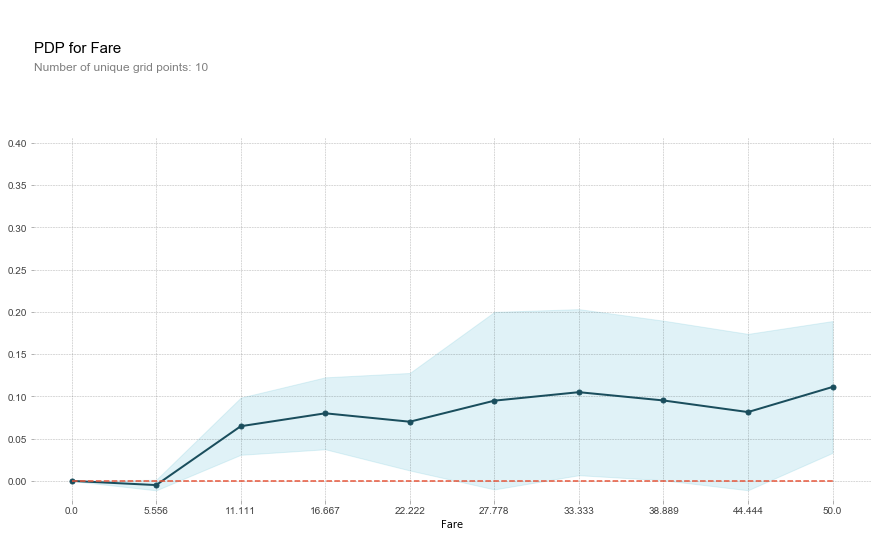

In [46]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=100, x_quantile=True)

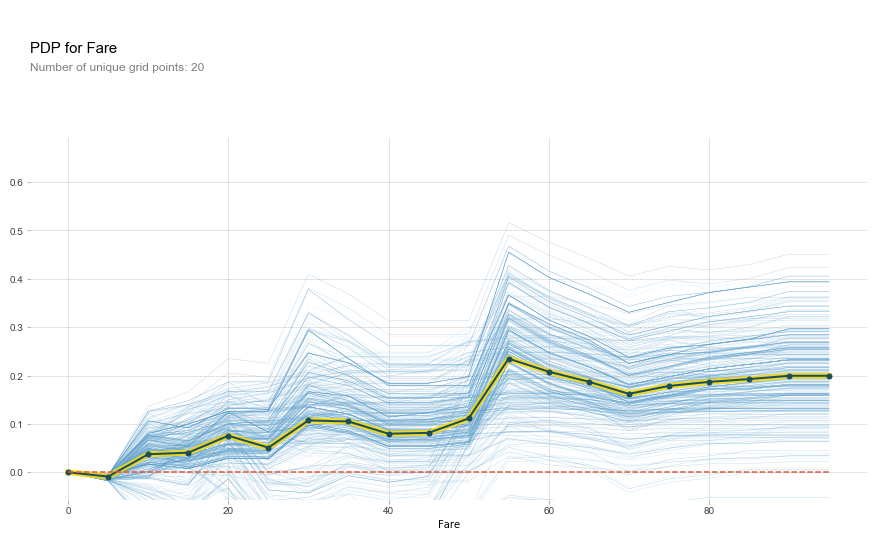

In [48]:
# try to customized the grid points
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', cust_grid_points=range(0, 100, 5))
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

In [13]:
inter1 = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

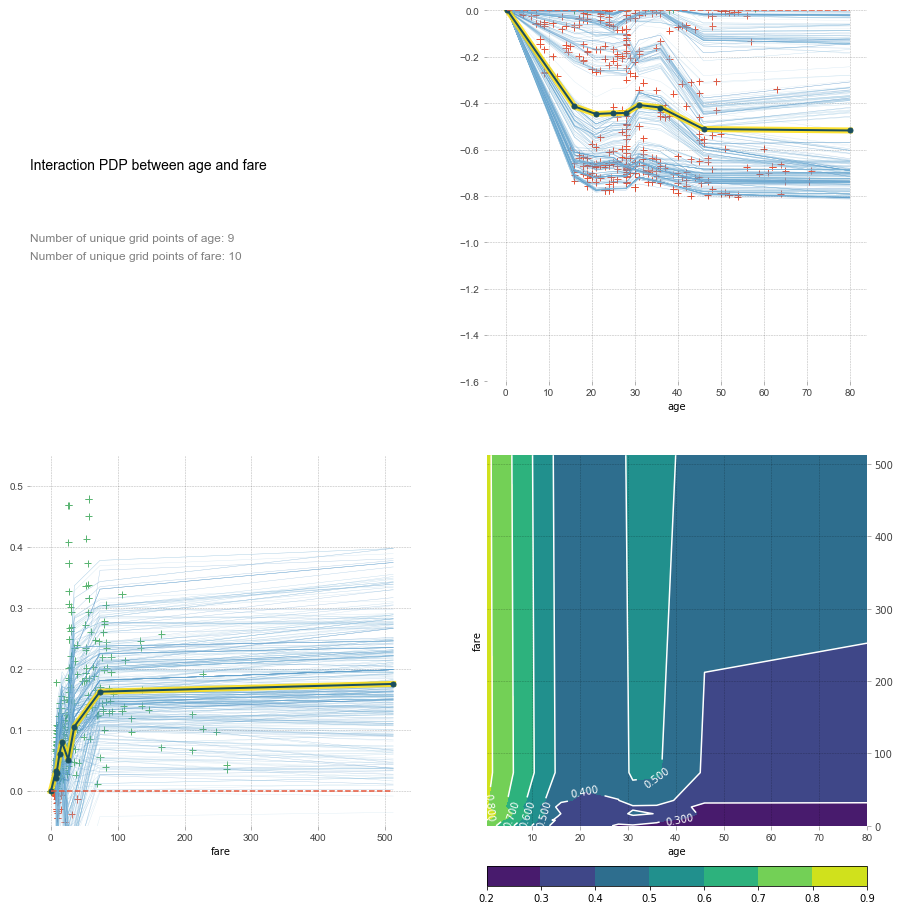

In [14]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### it is better to set x_quantile=True

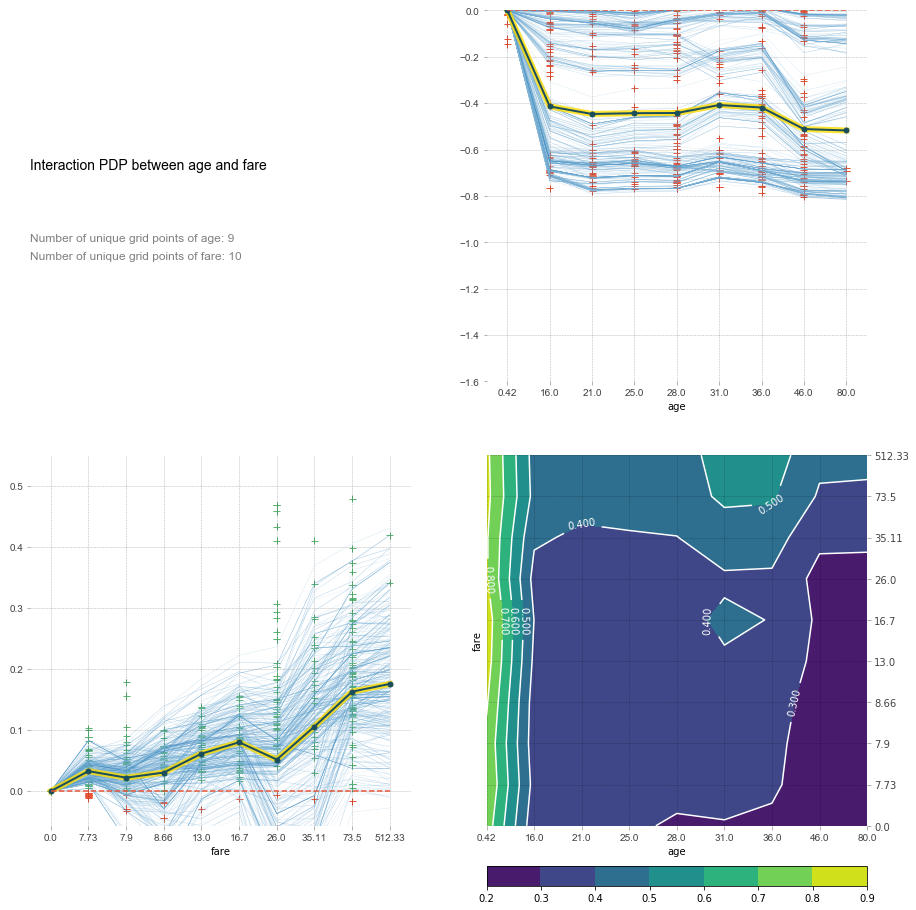

In [15]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)